In [6]:
path = '/Users/pingal/Downloads/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/01/010/'

In [10]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

array([[-254, -254, -254, ...,  -34,   24,    5],
       [ 264,  264,  264, ...,  -68,  -49,  -34],
       [ 517,  517,  517, ...,  -34,  -73,  -39],
       ...,
       [ 810,  810,  810, ..., -205, -200, -171],
       [ 810,  810,  810, ..., -200, -195, -166],
       [ 527,  527,  527, ...,  102,   93,  112]], dtype=int16)

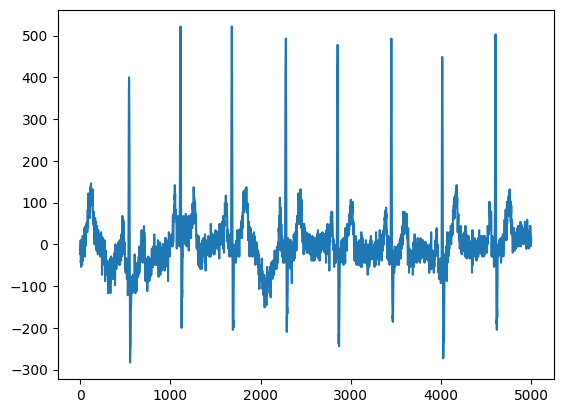

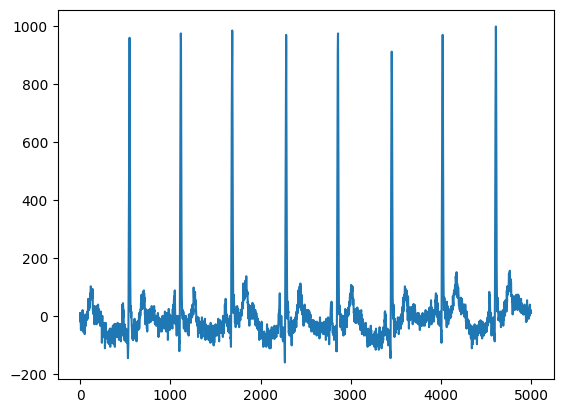

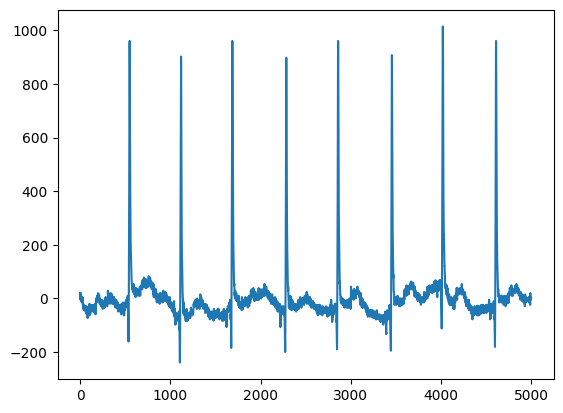

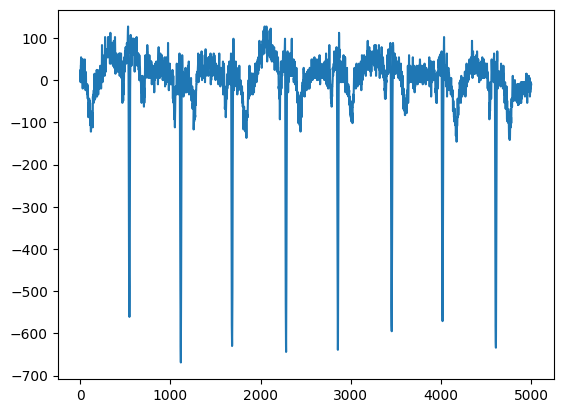

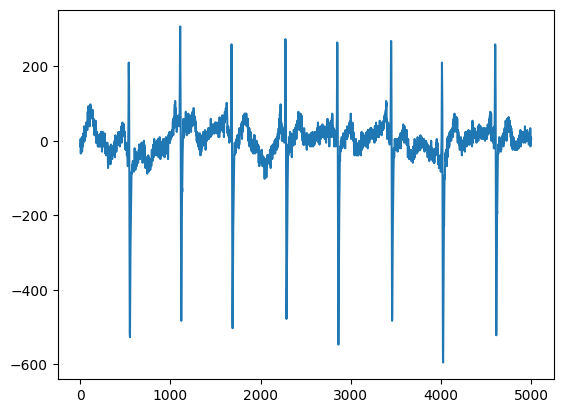

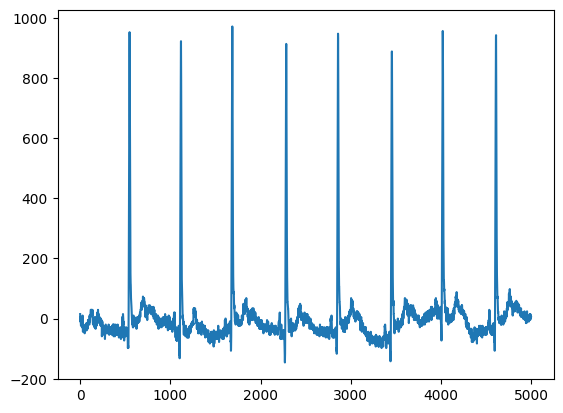

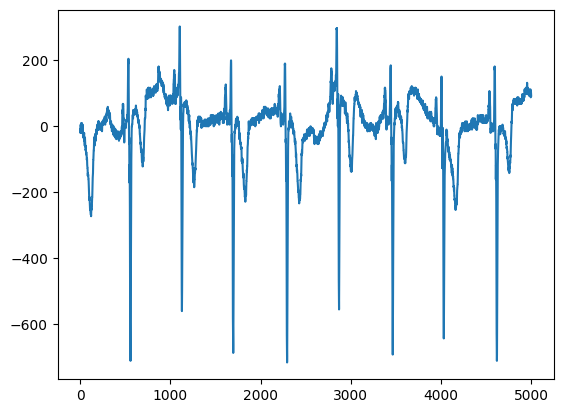

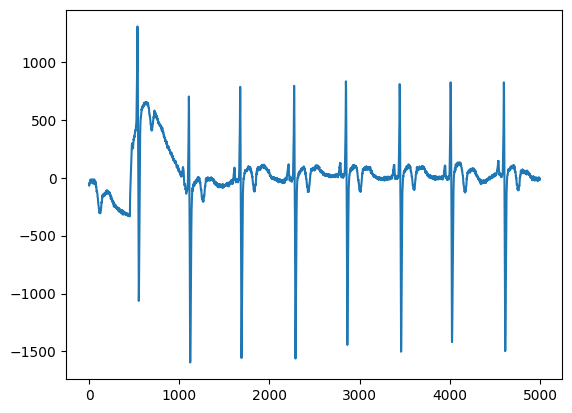

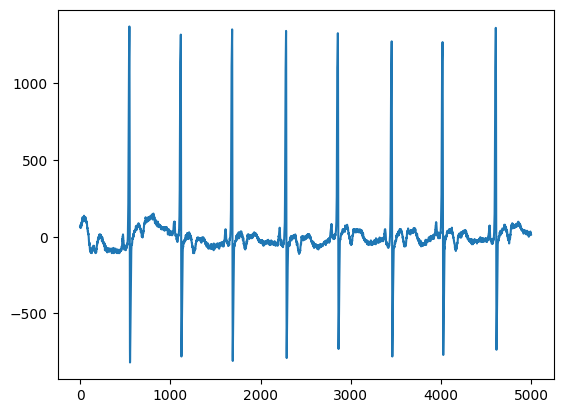

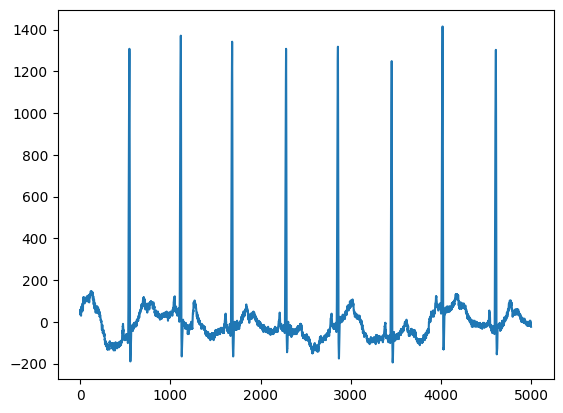

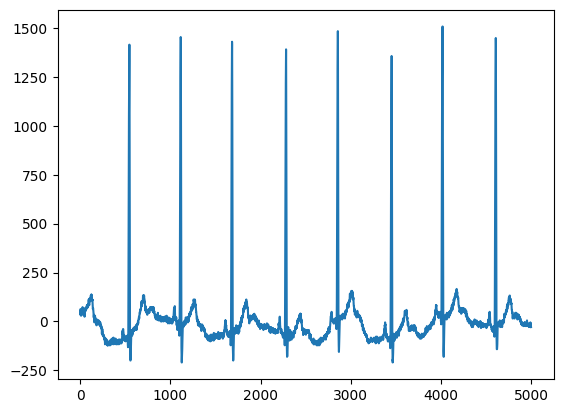

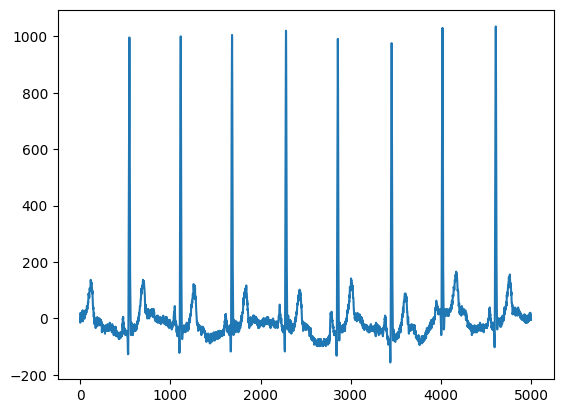

In [16]:
mat = loadmat(path + 'JS00002.mat')
for  i in range(12):
    plt.plot(mat['val'][i])
    plt.show()

In [24]:
def superposition(data):
    scale = StandardScaler()
    

    scaled = scale.fit_transform(data)
    sum=np.zeros((5000,5000))
    x = np.linspace(-1,1,5000)
    for i in range(data.shape[1]):
        sum=sum+np.outer(data[:,i],legendre(i+1)(x))
    
    return sum

cc = superposition(np.transpose(mat['val']))
print(f'shape : {cc.shape}')



shape : (5000, 5000)


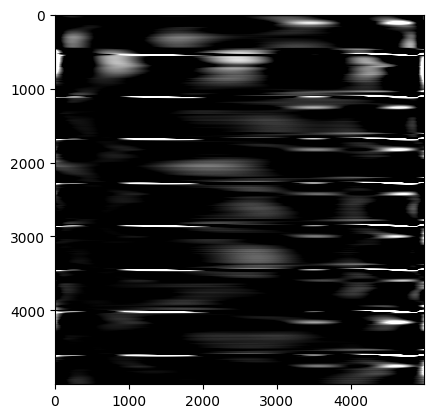

In [28]:
plt.imshow(cc, cmap = 'gray', vmin = 10, vmax = 255)

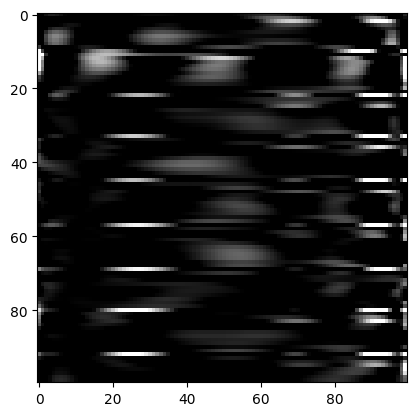

In [30]:
plt.imshow(cc1, cmap = 'gray', vmin = 10, vmax = 255)


In [29]:
def coarse_grain(data,f):
    img = superposition(data)
    s1=np.zeros((int(img.shape[0]/f),int(img.shape[1]/f))) # Coarse grained image
    for i in range(s1.shape[0]):
        for j in range(s1.shape[1]):
            s1[i,j]=np.mean(img[i*f:i*f+f,j*f:j*f+f]) 

    return s1


cc1 = coarse_grain(np.transpose(mat['val']),50)

In [1]:
import os
num_workers = os.cpu_count()
print(f'No of cores : {num_workers}')

num_workers = 60

No of cores : 80


In [17]:
from sklearn.preprocessing import StandardScaler




import numpy as np
from numpy import load
import scipy
import matplotlib.pyplot as plt
from scipy.special import legendre
from numpy.linalg import svd

from time import time



from joblib import Parallel, delayed




def superposition(data):
    scale=StandardScaler()
    

    scaled = scale.fit_transform(data)
    sum=np.zeros((5000,5000))
    x = np.linspace(-1,1,5000)
    for i in range(data.shape[1]):
        sum=sum+np.outer(data[:,i],legendre(i+1)(x))
    
    return sum

def singularvaluedecomposition(data):
    data_sup = superposition(data)
    a, data_svd, b = svd(data_sup)

    return data_svd

def normalize_matrix(matrix):
    matrix_norm = np.linalg.norm(matrix, 'fro')

    if np.isnan(matrix_norm):
        return np.zeros_like(matrix)
    else:
        normalized_matrix = matrix / matrix_norm
        return normalized_matrix

    

############################################################
    
#### SR data

data = load('disease_SR.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)




for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        norm_matrix.append(normalize_matrix(cc[j]))

        

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = 10)(delayed(singularvaluedecomposition)(x) for x in cc)
    end = time()

    print(end- start)

    np.savetxt('disease_SR_svd' + '_'+str(i) + '.txt',results)


############################################################
    
#### SB data
    
data = load('disease_SB.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)




for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        norm_matrix.append(normalize_matrix(cc[j]))

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = 10)(delayed(singularvaluedecomposition)(x) for x in cc)
    end = time()

    print(end- start)

    np.savetxt('disease_SB_svd' + '_'+str(i) + '.txt',results)


############################################################
    
#### SB data
    
data = load('disease_ST.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)




for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        norm_matrix.append(normalize_matrix(cc[j]))

    cc = norm_matrix
    
    start = time()
    results = Parallel(n_jobs = 10)(delayed(singularvaluedecomposition)(x) for x in cc)
    end = time()

    print(end- start)
    np.savetxt('disease_ST_svd' + '_'+str(i) + '.txt',results)

FileNotFoundError: [Errno 2] No such file or directory: 'disease_SR.npy'